<a href="https://colab.research.google.com/github/shriiill/pet-skin-disease-detector/blob/main/Detection1YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Dec 11 05:11:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.30GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Specify the path to the uploaded zip file
zip_file_path = '/content/drive/MyDrive/datasetanimal.zip'

# Define the target directory where you want to extract the contents
extracted_dir = '/content/drive/MyDrive/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/dataset/data.yaml epochs=300 imgsz=640 patience=70

/content
100% 6.23M/6.23M [00:00<00:00, 76.3MB/s]
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=300, patience=70, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
#!ls {HOME}/runs/detect/train/

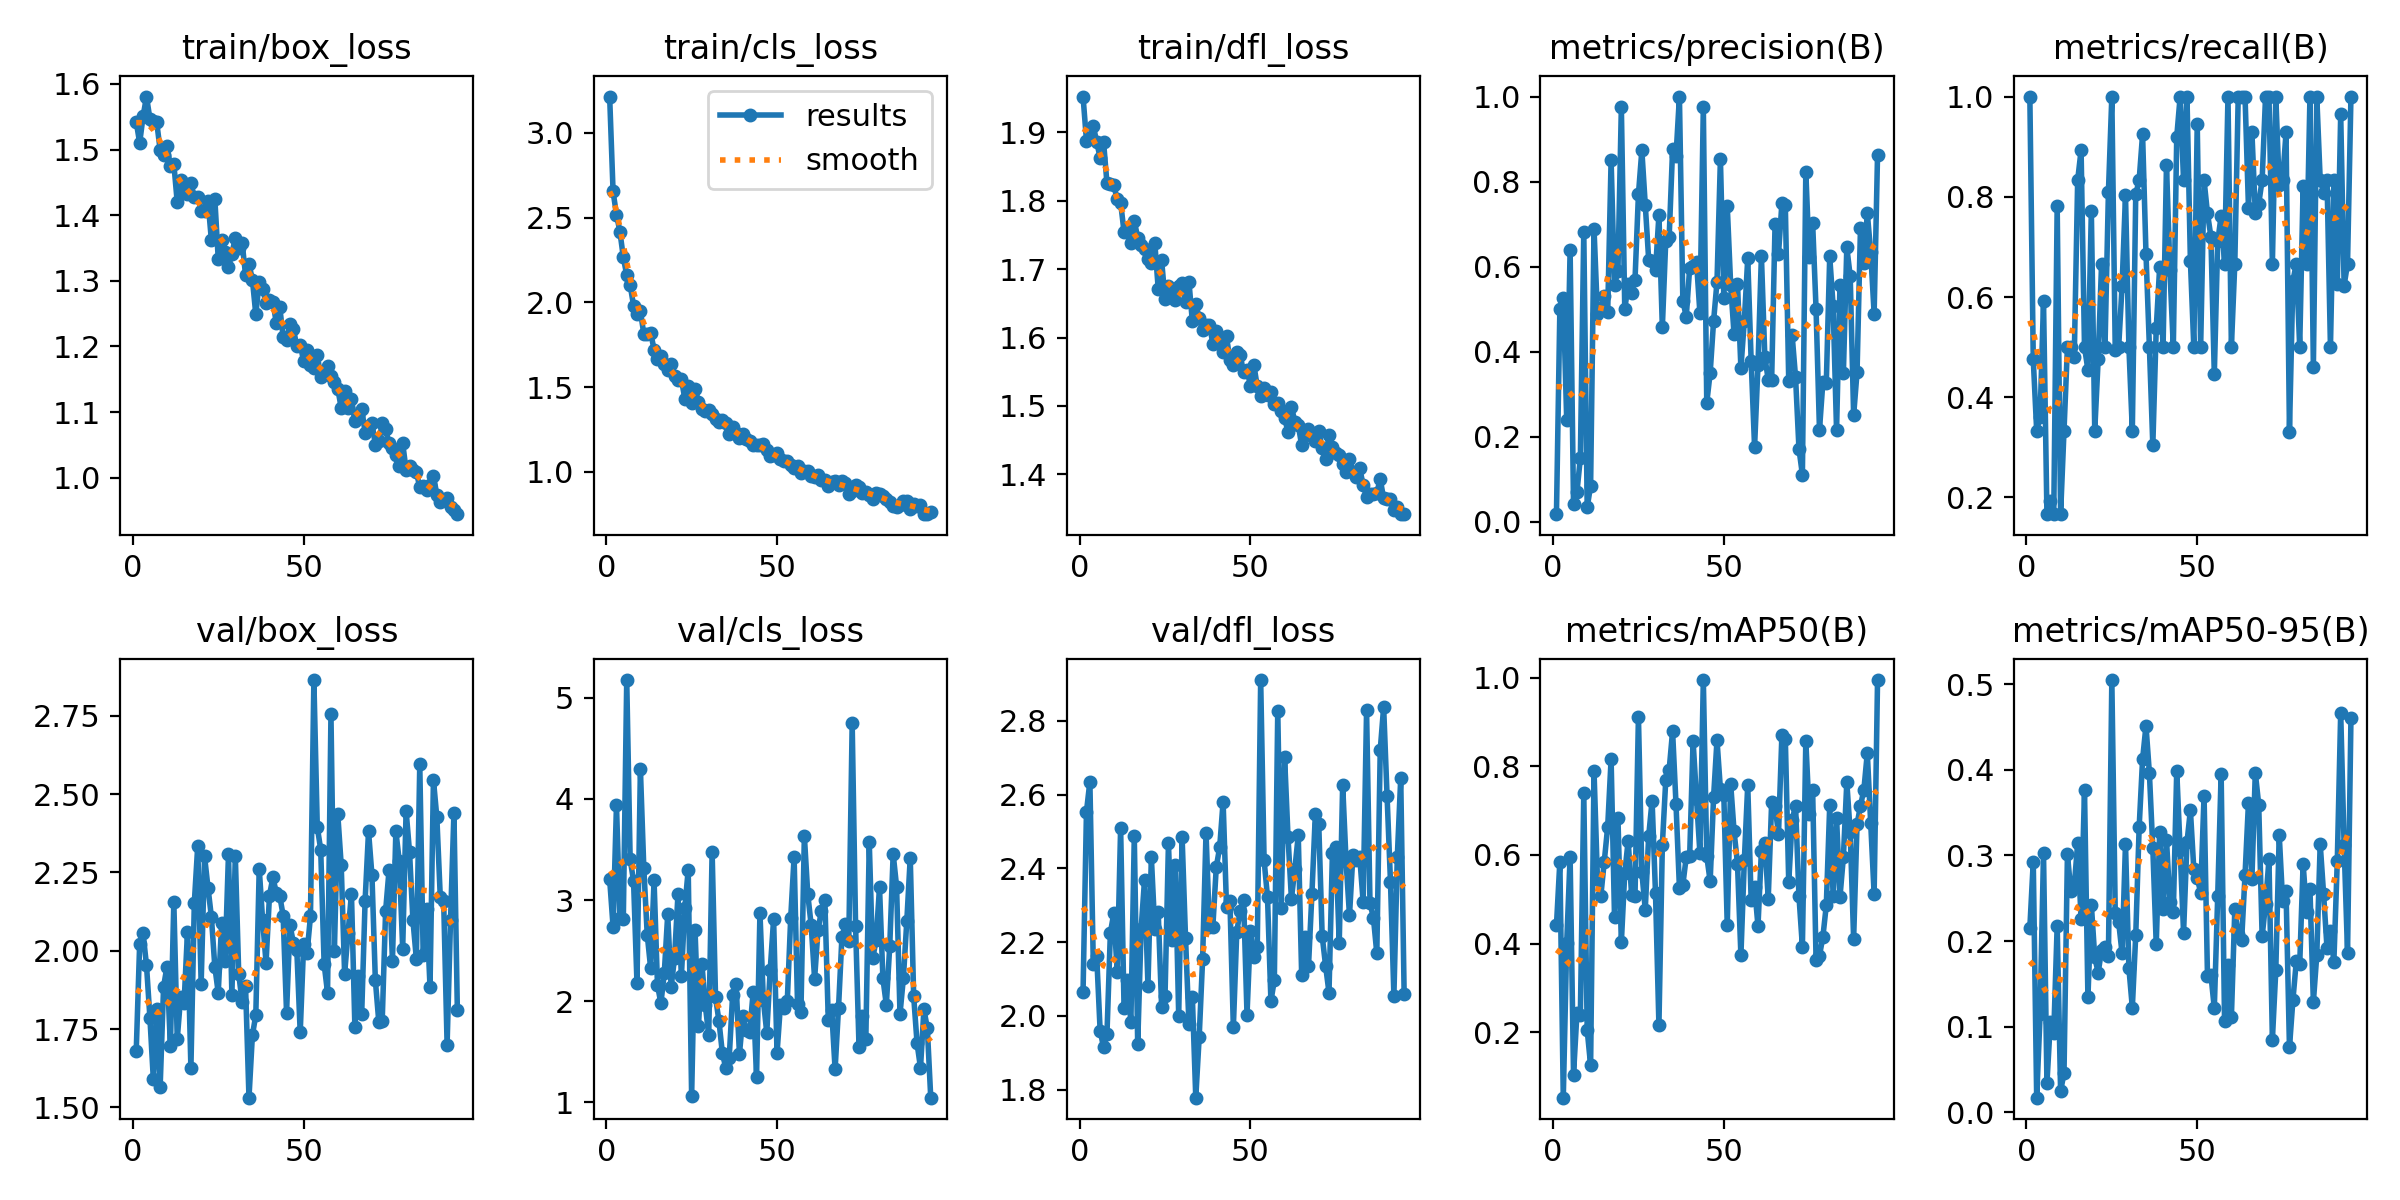

In [ ]:
#%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

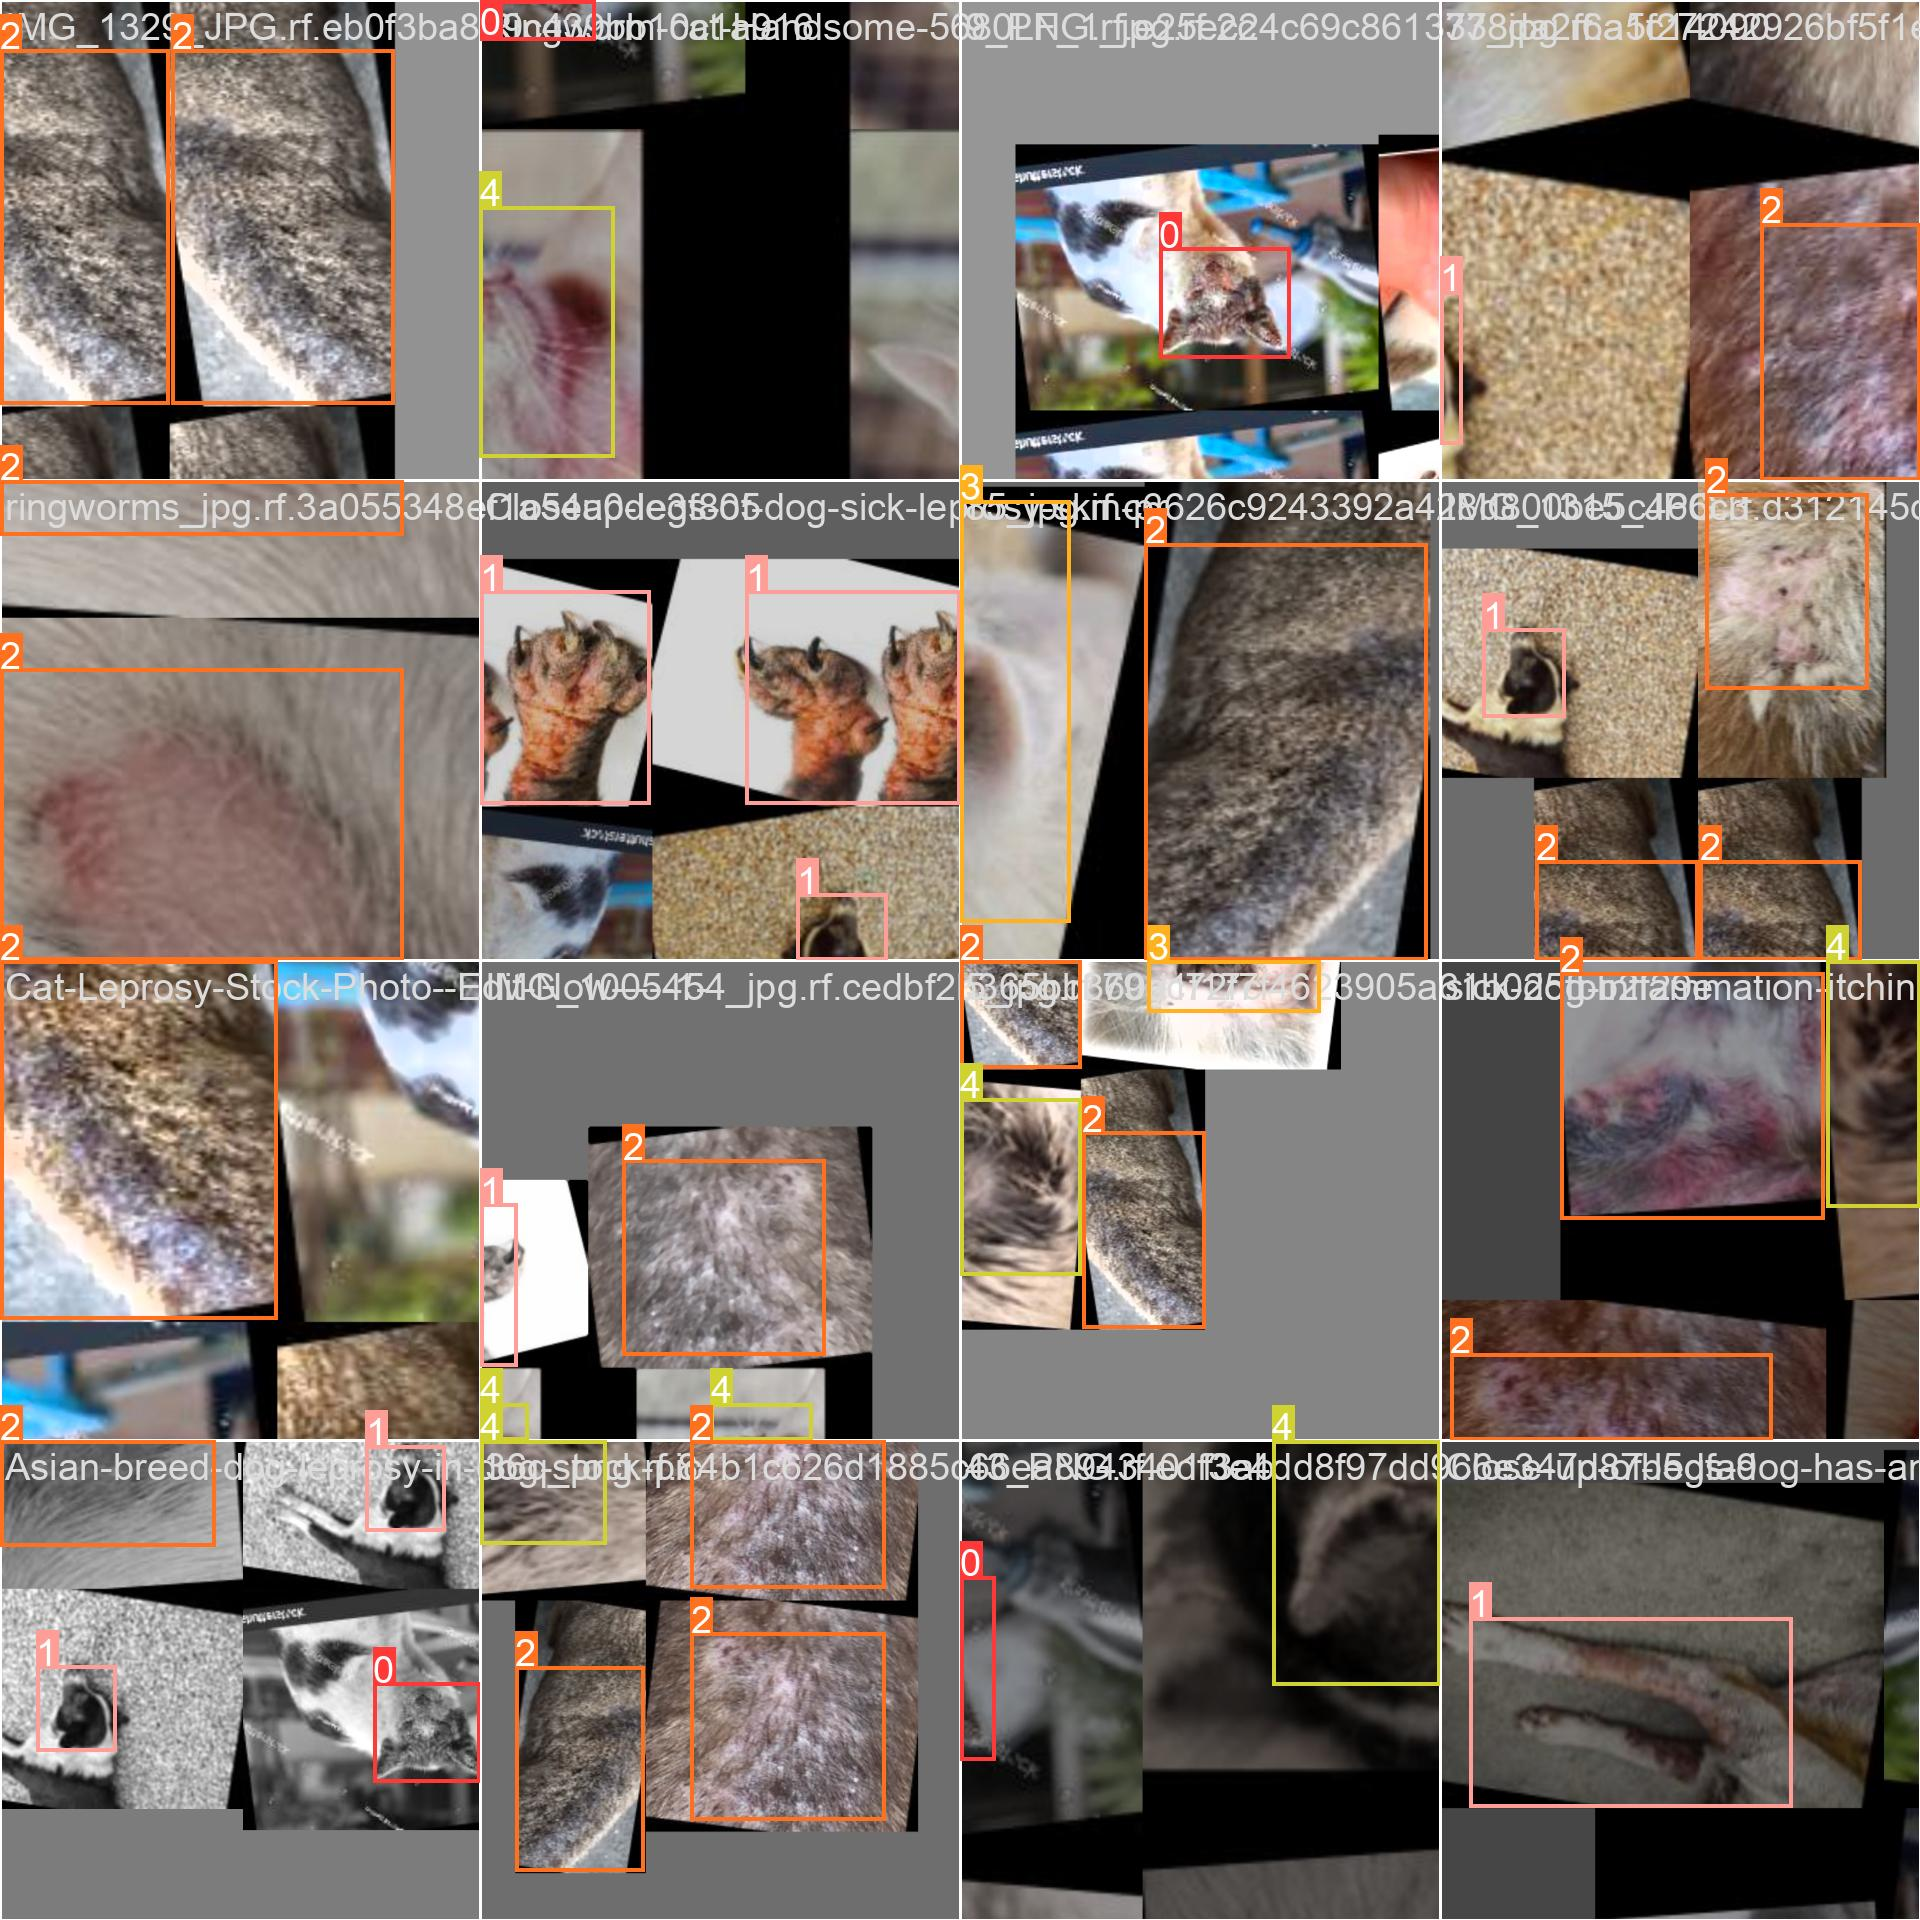

In [ ]:
#%cd {HOME}
Image(filename=f'/content/runs/detect/train/train_batch1.jpg', width=500)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/dataset/test/images

/content
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

image 1/160 /content/drive/MyDrive/dataset/test/images/104_jpg.rf.1c6b01a25c6e0b899fb1726513ba918f.jpg: 640x480 1 Ear-mites, 115.1ms
image 2/160 /content/drive/MyDrive/dataset/test/images/11_PNG.rf.c6ede27b854a2b4d2c5906fa77a3f744.jpg: 640x480 2 cat-ringworms, 26.9ms
image 3/160 /content/drive/MyDrive/dataset/test/images/13e_png.rf.a54f98a186127e6eaca01a6e8a3e76d8.jpg: 640x640 1 cat-ringworm, 8.6ms
image 4/160 /content/drive/MyDrive/dataset/test/images/1_jpg.rf.4a2e408ae8ef5e9c86e8497aa3bf390d.jpg: 448x640 1 Ear-mites, 53.4ms
image 5/160 /content/drive/MyDrive/dataset/test/images/2009-2652-Yegar-M-Canis-Ca_jpg.rf.8791e7fd2ad7b67e44dc68d885698d27.jpg: 640x608 1 Dog-ringworm, 49.6ms
image 6/160 /content/drive/MyDrive/dataset/test/images/2009-2652-Yegar-M-Canis-Cafh_jpg.rf.849f76a302352d775b7406aa72861885.jpg: 608x

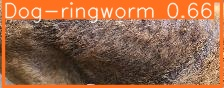

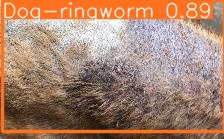

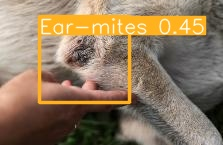

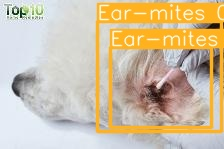

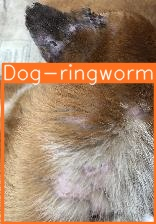

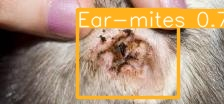

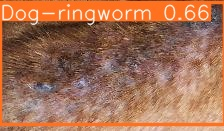

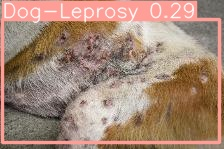

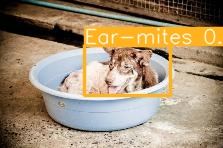

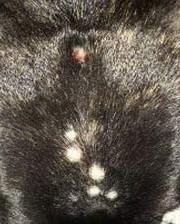

In [ ]:
import glob
from IPython.display import Image, display
for  image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path,width=600))
  print("\n")

**Test on Local Images**

In [ ]:
#file transfer to collab
import zipfile

source_folder_path = "/content/runs"  # Replace with your folder path
zip_filename = "/content/drive/MyDrive/trainresults.zip"  # Replace with your desired zip file name

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(source_folder_path):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), source_folder_path))


In [ ]:
# !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.15 source=/content/tile_18_24.jpeg hide_labels=True hide_conf=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'hide_conf' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_conf' instead.
Ultralytics YOLOv8.0.165 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/1 /content/tile_18_24.jpeg: 960x960 111 Saplingss, 189 Weeds, 29.9ms
Speed: 9.5ms preprocess, 29.9ms inference, 3.1ms postprocess per image at shape (1, 3, 960, 960)
Results saved to runs/detect/predict8
